# Laboratório 2 - Análise Exploratória e Aprendizado Não-supervisionado
## Equipe:
## Pedro Anacleto Martins Senna De Oliveira
## André Luiz de Melo Thissen
## Nikollas da Silva Antes

### Importando Bibliotecas

In [28]:
import pandas as pd
from sklearn.cluster import KMeans #para usar o KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Preparação de dados
- Verificação de elementos nulos e eliminação dessas linhas.
- Conversão dos valores em que estão em cm para mm a fim de normalizar dados.
- Normalização de dados.

In [20]:
aves=pd.read_csv("dataset_lab2.csv",on_bad_lines='skip',sep=',')

In [21]:
print(aves.isnull().values.any())

True


In [22]:
aves = aves.dropna(how='any')
aves = aves.drop(columns='id')
print(aves.isnull().values.any())

False


In [23]:
# transformação dos valores de centímetro para milímetro
for i in aves.index:
    aves.loc[i,'huml'] =  10*aves.loc[i,'huml']
    aves.loc[i,'tarl'] =  10*aves.loc[i,'tarl']
    aves.loc[i,'feml'] =  10*aves.loc[i,'feml']
    aves.loc[i,'ulnal'] =  10*aves.loc[i,'ulnal']
# normalizaçao de dados
for feature in aves.columns[:]:
    maxvalue=max(aves[feature])
    minvalue=min(aves[feature])
    for i in aves.index:
        aves.loc[i,feature] = (aves.loc[i,feature] - minvalue)/(maxvalue - minvalue)
aves

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0.172937,0.331737,0.141992,0.352727,0.284873,0.258637,0.000000,0.311024,0.184955,0.236783
1,0.192759,0.328743,0.162879,0.417273,0.334569,0.314659,0.318635,0.358268,0.201698,0.249442
2,0.170962,0.313174,0.135250,0.389091,0.296845,0.277311,0.297868,0.312008,0.182623,0.199553
3,0.165305,0.273054,0.126670,0.342727,0.268054,0.241830,0.271514,0.249016,0.167494,0.204765
4,0.129099,0.221557,0.093158,0.248182,0.210186,0.167134,0.216503,0.205709,0.144173,0.183917
...,...,...,...,...,...,...,...,...,...,...
415,0.019773,0.029341,0.012650,0.030000,0.062049,0.056956,0.109808,0.045276,0.085033,0.036485
416,0.022821,0.029940,0.016352,0.044545,0.070410,0.048553,0.118166,0.040354,0.094660,0.036485
417,0.021797,0.029341,0.014072,0.048182,0.086754,0.046685,0.123454,0.053150,0.090235,0.040953
418,0.025674,0.038323,0.020691,0.045455,0.090460,0.051354,0.130448,0.064961,0.108892,0.043187


### Análise exploratória

- Plotagem dos gráficos de scatter de todas as variáveis dois a dois.Na diagonal principal, temos os histogramas de cada feature que pode ser identificada no eixo horizontal.
- O boxplot pode ser visto em seguida.
- Foi utilizado funções da biblioteca Pandas.

array([[<AxesSubplot:xlabel='huml', ylabel='huml'>,
        <AxesSubplot:xlabel='humw', ylabel='huml'>,
        <AxesSubplot:xlabel='ulnal', ylabel='huml'>,
        <AxesSubplot:xlabel='ulnaw', ylabel='huml'>,
        <AxesSubplot:xlabel='feml', ylabel='huml'>,
        <AxesSubplot:xlabel='femw', ylabel='huml'>,
        <AxesSubplot:xlabel='tibl', ylabel='huml'>,
        <AxesSubplot:xlabel='tibw', ylabel='huml'>,
        <AxesSubplot:xlabel='tarl', ylabel='huml'>,
        <AxesSubplot:xlabel='tarw', ylabel='huml'>],
       [<AxesSubplot:xlabel='huml', ylabel='humw'>,
        <AxesSubplot:xlabel='humw', ylabel='humw'>,
        <AxesSubplot:xlabel='ulnal', ylabel='humw'>,
        <AxesSubplot:xlabel='ulnaw', ylabel='humw'>,
        <AxesSubplot:xlabel='feml', ylabel='humw'>,
        <AxesSubplot:xlabel='femw', ylabel='humw'>,
        <AxesSubplot:xlabel='tibl', ylabel='humw'>,
        <AxesSubplot:xlabel='tibw', ylabel='humw'>,
        <AxesSubplot:xlabel='tarl', ylabel='humw'>,
       

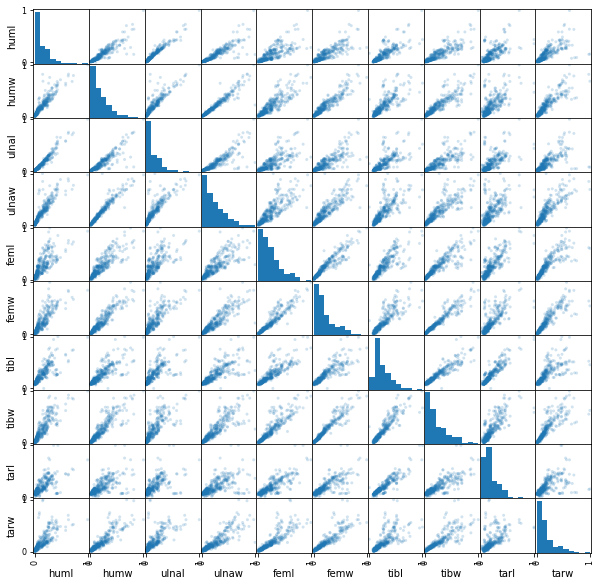

In [24]:
pd.plotting.scatter_matrix(aves,alpha=0.2,figsize=(10,10))

<AxesSubplot:>

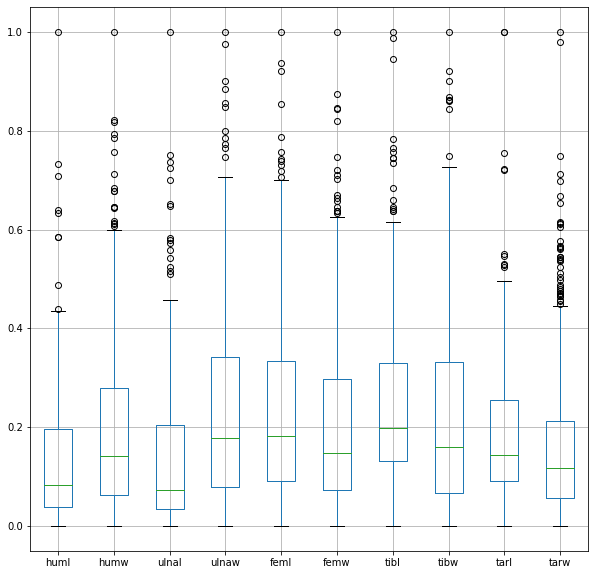

In [25]:
variables=[]
for feature in aves.columns[:]:
    variables.append(feature)
aves.boxplot(column=variables,figsize=(10,10))

### Aprendizado Não-supervisionado e Clusterização

In [26]:
wcss=[]
#Agrupando em 2 Clusters
kmeans2 = KMeans(
n_clusters = 2, #numero de clusters
init = 'k-means++', 
n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300 #numero máximo de iterações
)
kmeans2.fit(aves)

#Agrupando em 3 Clusters
kmeans3 = KMeans(
n_clusters = 3, #numero de clusters
init = 'k-means++', 
n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300 #numero máximo de iterações
)
kmeans3.fit(aves)

#Agrupando em 6 Clusters
kmeans6 = KMeans(
n_clusters = 6, #numero de clusters
init = 'k-means++', 
n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300 #numero máximo de iterações
)
kmeans6.fit(aves)

#Agrupando em 9 Clusters
kmeans9 = KMeans(
n_clusters = 9, #numero de clusters
init = 'k-means++', 
n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300 #numero máximo de iterações
)
kmeans9.fit(aves)


KMeans(n_clusters=9)

#### Sillhouette Method

In [27]:
range_clusters = [2, 3, 6, 9]
for n_clusters in range_clusters:
    clusterer = KMeans(
        n_clusters = n_clusters, #numero de clusters
        init = 'k-means++', 
        n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
        max_iter = 300 #numero máximo de iterações)
    )
    cluster_labels = clusterer.fit_predict(aves)
    silhouette_avg = silhouette_score(aves, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.5978681711713764
For n_clusters = 3 The average silhouette_score is : 0.5046702000809509
For n_clusters = 6 The average silhouette_score is : 0.37304554395200323
For n_clusters = 9 The average silhouette_score is : 0.38643141691608013
